In [1]:
import starfile
import mrcfile
import pandas as pd
import argparse
import os, glob, re
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
glob_file = '/mnt/McQueen-001/CS-PROJECTS-McQueen-001/CS-brem-70s-ge81112-18012024/S1/motioncorrected/FoilHole_*_Fractions_patch_aligned.mrc'
n_mics = 1000
foAvgMrc = 'gain-noFLIP.mrc'

In [3]:
mic_list = glob.glob(glob_file)
#print(mic_list)

In [4]:
array_sum = np.zeros((4092, 5760), dtype=np.float16)

for i in tqdm.tqdm(range(n_mics)):
    #print(mic_list[i])
    array_sum += mrcfile.read(mic_list[i])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:39<00:00,  1.73it/s]


In [6]:
array_sum /= n_mics

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-4.84765625, -4.84375   , -4.84375   , ...,  3.55078125,
         3.55273438,  3.5546875 ]),
 <BarContainer object of 4124 artists>)

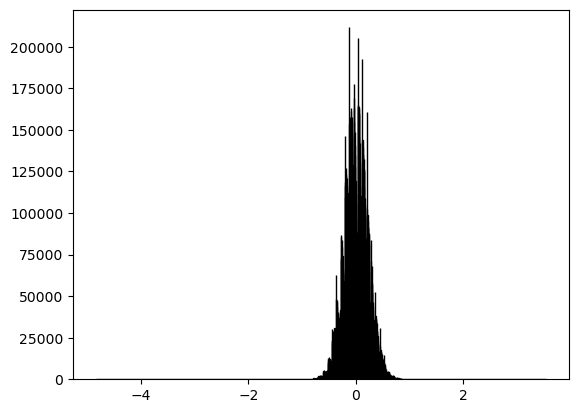

In [7]:
plt.hist(array_sum.ravel(), bins='auto', fc='k', ec='k')

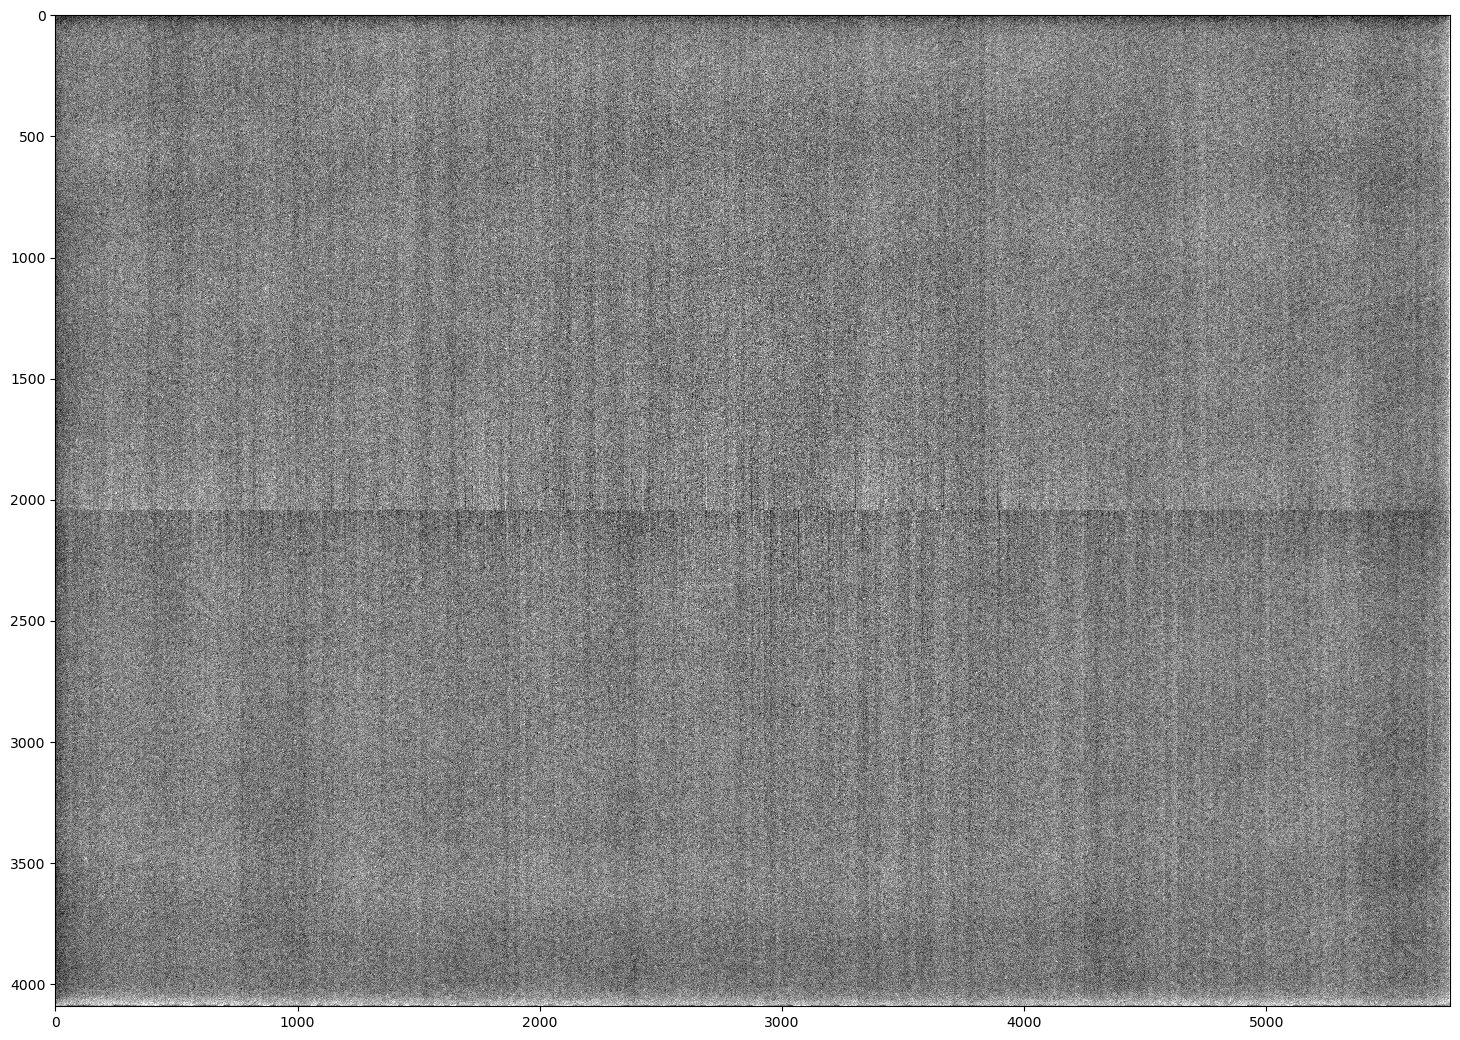

In [13]:
fig, ax = plt.subplots(figsize=(18, 24))
ax.imshow(array_sum,interpolation='none', cmap='grey', clim=(-1, 1))

In [14]:
with mrcfile.new(foAvgMrc, overwrite=True) as mrc:
    mrc.set_data(array_sum)
    #mrc.set_image_stack()
    mrc.voxel_size = 1 # set with varialble todo
    mrc.update_header_from_data()

In [15]:
MrcGain = mrcfile.open(foAvgMrc, mode='r+')
MrcGain.data.shape

(4092, 5760)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-4.84765625, -4.84375   , -4.84375   , ...,  3.55078125,
         3.55273438,  3.5546875 ]),
 <BarContainer object of 4124 artists>)

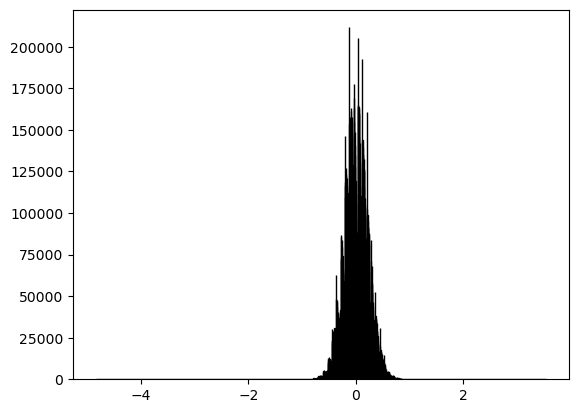

In [16]:
plt.hist(MrcGain.data.ravel(), bins='auto', fc='k', ec='k')

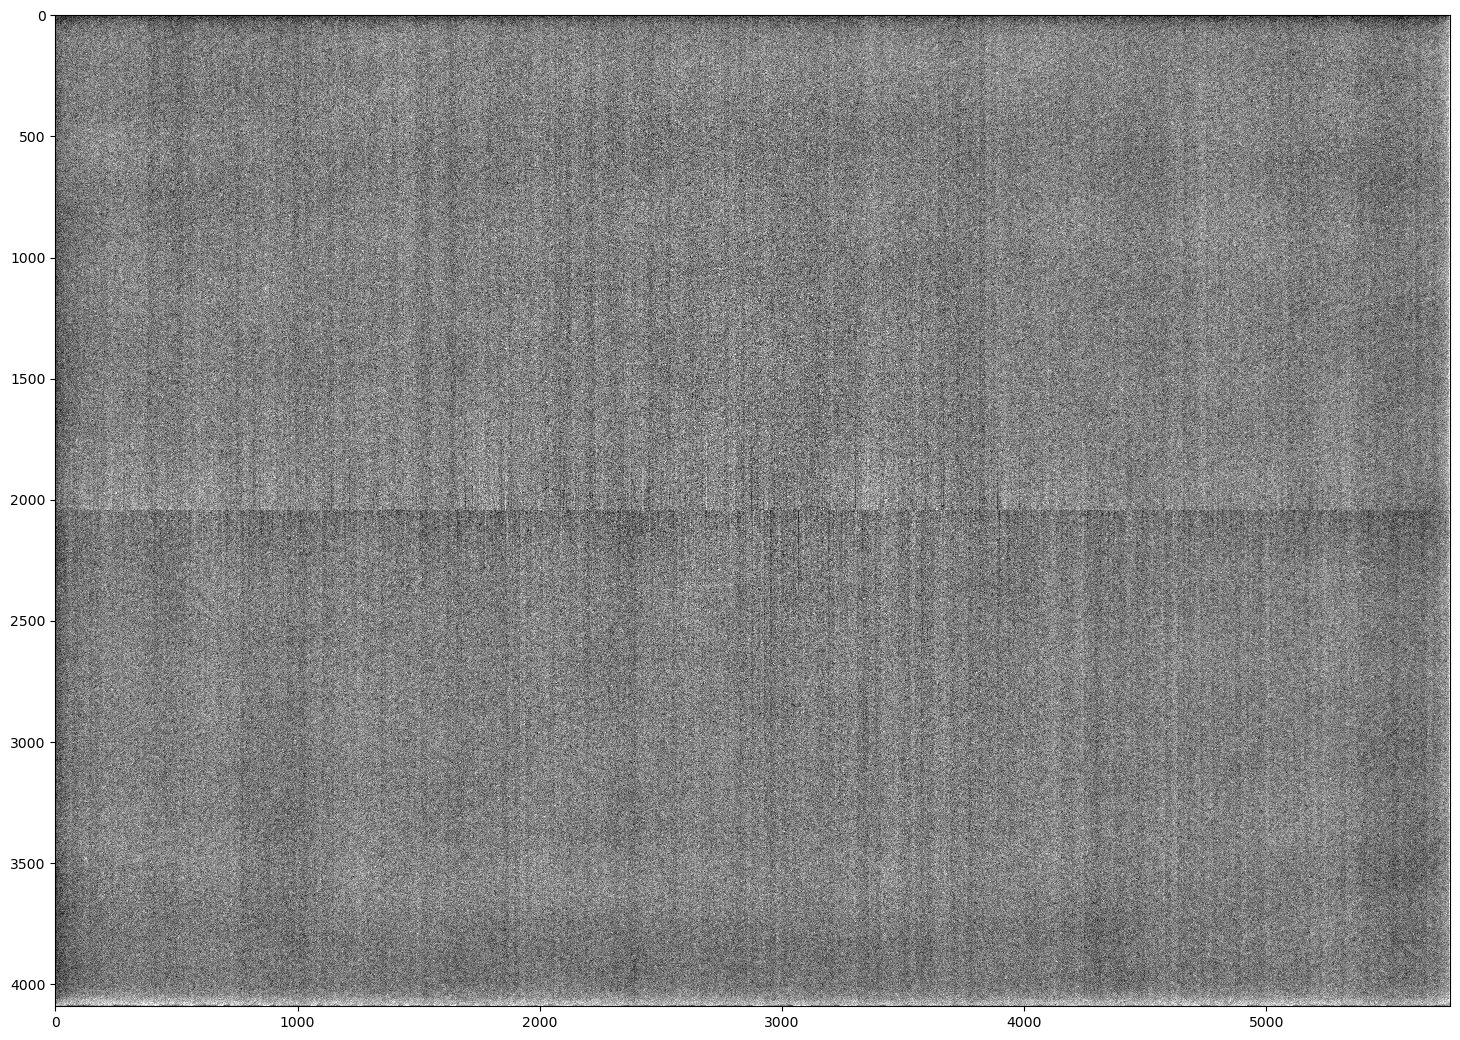

In [17]:
fig, ax = plt.subplots(figsize=(18, 24))
ax.imshow(MrcGain.data,interpolation='none', cmap='grey', clim=(-1, 1))

In [ ]:
mrcfile.read(mic_list[0])

In [ ]:
a = np.array([1, 2, 3], float)
b = a

a += b

a

In [ ]:
a += b

In [ ]:
a


In [ ]:
mrc = mrcfile.open(mic_list[0], mode='r+')
mrc.data.shape

In [ ]:
mrc.data